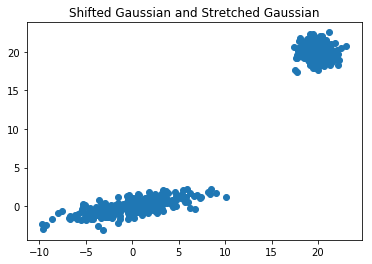

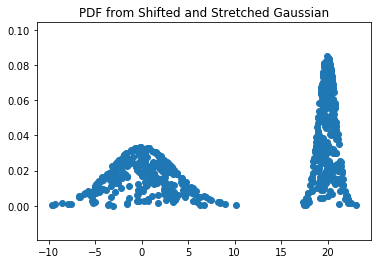

In [40]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from math import sqrt
from numpy import zeros
from numpy import numarray
from sklearn import mixture
from scipy.stats import norm

n_samples = 300
# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

xData = np.hstack([shifted_gaussian[:,0], stretched_gaussian[:,0]])
yData = np.hstack([shifted_gaussian[:,1], stretched_gaussian[:,1]])
plt.scatter(xData, yData)

plt.title("Shifted Gaussian and Stretched Gaussian")
plt.show()

clf = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(np.vstack([shifted_gaussian, stretched_gaussian]))

pdfsShiftedGauss = np.exp(clf.score_samples(shifted_gaussian))
pdfsStrechedGauss = np.exp(clf.score_samples(stretched_gaussian))

'''plt.scatter(shifted_gaussian[:,0], pdfsShiftedGauss)
plt.show()
plt.scatter(stretched_gaussian[:,1], pdfsStrechedGauss)
plt.show()'''
plt.scatter(np.hstack([shifted_gaussian[:,0], stretched_gaussian[:,0]]), np.hstack([pdfsShiftedGauss, pdfsStrechedGauss]))
plt.title("PDF from Shifted and Stretched Gaussian")
plt.show()

Area under curves  0.211299547334


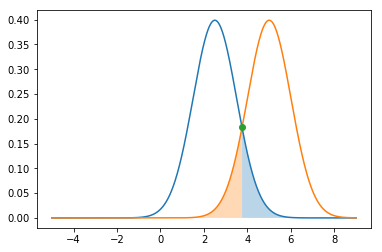

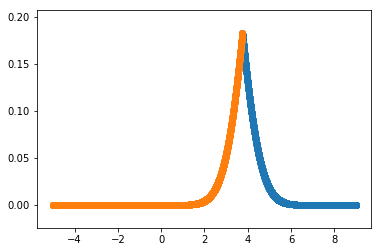

'\nbbPath = mplPath.Path()\nbbPath.contains_point((200, 100))\n'

In [54]:
import numpy as np
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
from scipy.stats import norm
norm.cdf(1.96)

def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

m1 = 2.5
std1 = 1.0
m2 = 5.0
std2 = 1.0

#Get point of intersect
result = solve(m1,m2,std1,std2)

#Get point on surface
x = np.linspace(-5,9,10000)

plot1=plt.plot(x,norm.pdf(x,m1,std1))
plot2=plt.plot(x,norm.pdf(x,m2,std2))
plot3=plt.plot(result,norm.pdf(result,m1,std1),'o')

#Plots integrated area
r = result[0]
olap = plt.fill_between(x[x>r], 0, norm.pdf(x[x>r],m1,std1),alpha=0.3)
olap = plt.fill_between(x[x<r], 0, norm.pdf(x[x<r],m2,std2),alpha=0.3)

# integrate
area = norm.cdf(r,m2,std2) + (1.-norm.cdf(r,m1,std1))
print("Area under curves ", area)

num_pts = 10000
sample_xs = np.random.uniform(0, 8, size=num_pts)
sample_ys = np.random.uniform(0, 0.5, size=num_pts)
ax.scatter(sample_xs, sample_ys, color='black')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x[x>r], norm.pdf(x[x>r],m1,std1))
ax.scatter(x[x<r], norm.pdf(x[x<r],m2,std2))
plt.show()

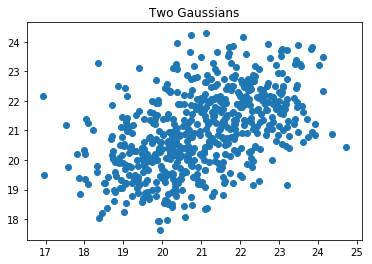

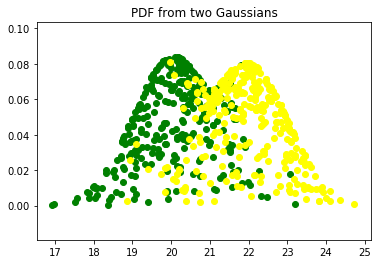

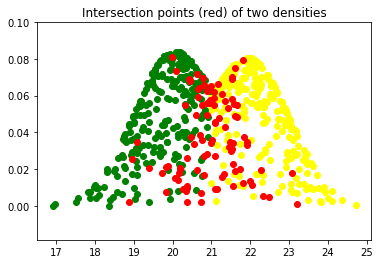

In [3]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from math import sqrt
from numpy import zeros
from numpy import numarray
from sklearn import mixture
from scipy.stats import norm

def solve(m1,m2,s1,s2):
    x1 = (s1*s2*np.sqrt((-2*np.log(s1/s2)*s2**2)+2*s1**2*np.log(s1/s2)+m2**2-2*m1*m2+m1**2)+m1*s2**2-m2*s1**2)/(s2**2-s1**2)
    x2 = -(s1*s2*np.sqrt((-2*np.log(s1/s2)*s2**2)+2*s1**2*np.log(s1/s2)+m2**2-2*m1*m2+m1**2)-m1*s2**2+m2*s1**2)/(s2**2-s1**2)
    return x1,x2

n_samples = 300

shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
shifted_gaussian2 = np.random.randn(n_samples, 2) + np.array([22, 22])

m1 = np.mean(shifted_gaussian)
std1 = np.std(shifted_gaussian)

m2 = np.mean(shifted_gaussian2)
std2 = np.std(shifted_gaussian2)

r = solve(m1,m2,std1,std2)[0]

xData = np.hstack([shifted_gaussian[:,0], shifted_gaussian2[:,0]])
yData = np.hstack([shifted_gaussian[:,1], shifted_gaussian2[:,1]])
plt.scatter(xData, yData)

plt.title("Two Gaussians")
plt.show()

clf = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(np.vstack([shifted_gaussian, shifted_gaussian2]))

pdfsShiftedGauss = np.exp(clf.score_samples(shifted_gaussian))
pdfsShiftedGauss2 = np.exp(clf.score_samples(shifted_gaussian2))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(shifted_gaussian[:,0], pdfsShiftedGauss, color='green')
ax.scatter(shifted_gaussian2[:,0], pdfsShiftedGauss2, color='yellow')
plt.title("PDF from two Gaussians")
plt.show()


x = shifted_gaussian[:,0]
y = pdfsShiftedGauss

x2 = shifted_gaussian2[:,0]
y2 = pdfsShiftedGauss2

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x2[x2>r], y2[x2>r], color='yellow')
ax.scatter(x[x<r], y[x<r], color='green')
ax.scatter(x2[x2<r], y2[x2<r], color='red')
ax.scatter(x[x>r], y[x>r], color='red')
plt.title("Intersection points (red) of two densities")
plt.show()

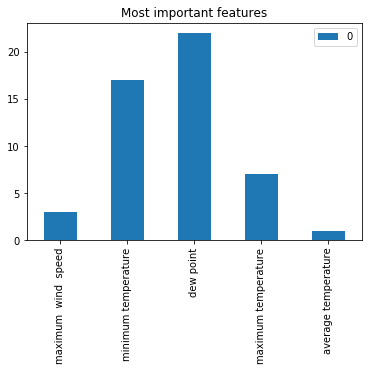

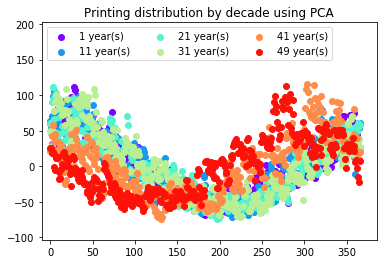

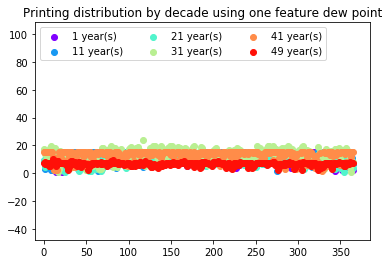

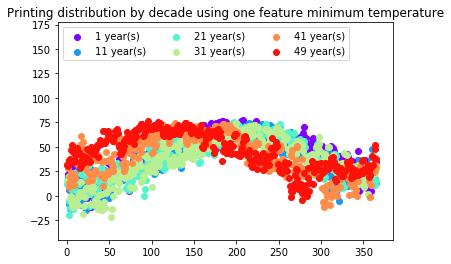

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import mixture
from collections import Counter


def mostImportantFeature(X, y):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X, y)
    return np.argsort(clf.feature_importances_)[-1]
    

def maps(num):
    m = {}
    m[0]="average temperature"
    m[1]="minimum temperature"
    m[2]="maximum temperature"
    m[3]="dew point"
    m[4]="sea level pressure"
    m[5]="visibility"
    m[6]="average wind speed"
    m[7]="maximum  wind  speed"
    
    return m[num]


def printMostImportantFeatureByYear(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep):
    
    arrImportant=[]
    
    for i in range(50):
        X = dataValues.loc[initialDataLength:finalDataLength].copy().values
        y = dataLabels.loc[initialDataLength:finalDataLength].copy().values
        arrImportant.append(maps(mostImportantFeature(X, y)))
        initialDataLength = finalDataLength
        finalDataLength += sizeStep
    
    letter_counts = Counter(arrImportant)
    df = pd.DataFrame.from_dict(letter_counts, orient='index')
    df.plot(kind='bar')
    plt.title("Most important features")
    plt.show()   
    
    
def printDistributionByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, option):
    title='Printing distribution by decade using'
    colors = cm.rainbow(np.linspace(0, 1, 50))
    if option == 99:
        title = "{} PCA".format(title)
    else:
        title = "{} one feature ({})".format(title, maps(option))
        
    for i in range(50):

        X = dataValues.loc[initialDataLength:finalDataLength].copy().values
        y = dataLabels.loc[initialDataLength:finalDataLength].copy().values

        xAxis = [i for i in range(len(X))]

        if option == 99:
            pca = PCA(n_components=1)
            X = pca.fit_transform(X)
        else:
            X = X[:,option]
        
        if i % 10 == 0 or i == 48:
            plt.scatter(xAxis, X, c=colors[i], label="{} year(s)".format(i+1))

        initialDataLength = finalDataLength
        finalDataLength += sizeStep

    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=10)
    plt.axis([-10, sizeStep+20, min(X)-50, max(X)+100])
    plt.title(title)
    plt.show()    
    
    
def main():
    path = os.getcwd()+'\\data\\'
    dataValues = pd.read_csv(path+'noaa_data.csv',sep = ",")
    dataLabels = pd.read_csv(path+'noaa_label.csv',sep = ",")
    initialDataLength=0
    finalDataLength=365
    sizeStep=365
    
    printMostImportantFeatureByYear(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep)
    
    #last parameter (99 = Using PCA, 0 up to 7 = Using one feature)
    printDistributionByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, 99)
    printDistributionByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, 3)
    printDistributionByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, 1)
    
    #print("Printing pdf by decade")
    #print("Using PCA")
    #printPdfByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, True)

    #print("Using the frequently most important feature (minimum temperature)")
    #printPdfByDecade(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, False)
    
main()

-30.4259290904


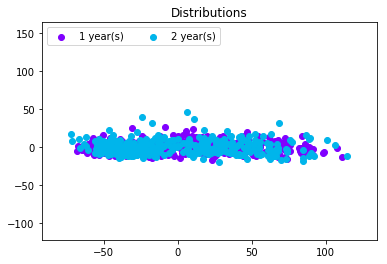

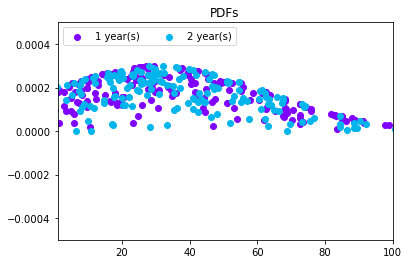

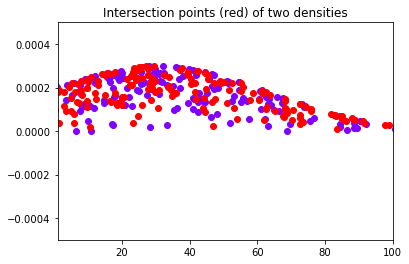

31.0708924526


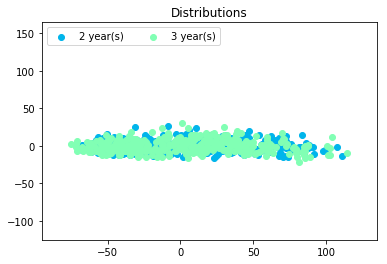

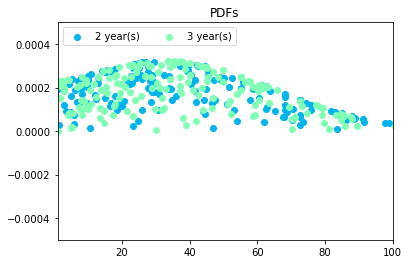

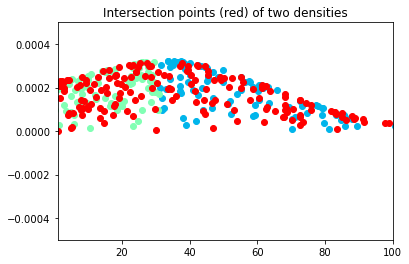

In [10]:
import os
import pandas as pd
import numpy as np
import random
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from math import sqrt
from numpy import zeros
from numpy import numarray
from sklearn import mixture
from scipy.stats import norm
from sklearn.decomposition import PCA
from collections import Counter

    
def solve(m1,m2,s1,s2):
    x1 = (s1*s2*np.sqrt((-2*np.log(s1/s2)*s2**2)+2*s1**2*np.log(s1/s2)+m2**2-2*m1*m2+m1**2)+m1*s2**2-m2*s1**2)/(s2**2-s1**2)
    x2 = -(s1*s2*np.sqrt((-2*np.log(s1/s2)*s2**2)+2*s1**2*np.log(s1/s2)+m2**2-2*m1*m2+m1**2)-m1*s2**2+m2*s1**2)/(s2**2-s1**2)
    return x1,x2


def printGaussianDistributions():
    n_samples = 300

    shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
    shifted_gaussian2 = np.random.randn(n_samples, 2) + np.array([22, 22])

    m1 = np.mean(shifted_gaussian)
    std1 = np.std(shifted_gaussian)

    m2 = np.mean(shifted_gaussian2)
    std2 = np.std(shifted_gaussian2)

    r = solve(m1,m2,std1,std2)[0]

    xData = np.hstack([shifted_gaussian[:,0], shifted_gaussian2[:,0]])
    yData = np.hstack([shifted_gaussian[:,1], shifted_gaussian2[:,1]])
    plt.scatter(xData, yData)

    plt.title("Two Gaussians")
    plt.show()

    clf = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(np.vstack([shifted_gaussian, shifted_gaussian2]))

    pdfsShiftedGauss = np.exp(clf.score_samples(shifted_gaussian))
    pdfsShiftedGauss2 = np.exp(clf.score_samples(shifted_gaussian2))

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(shifted_gaussian[:,0], pdfsShiftedGauss, color='green')
    ax.scatter(shifted_gaussian2[:,0], pdfsShiftedGauss2, color='yellow')
    plt.title("PDF from two Gaussians")
    plt.show()

    x = shifted_gaussian[:,0]
    y = pdfsShiftedGauss

    x2 = shifted_gaussian2[:,0]
    y2 = pdfsShiftedGauss2

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(x2[x2>r], y2[x2>r], color='yellow')
    ax.scatter(x[x<r], y[x<r], color='green')
    ax.scatter(x2[x2<r], y2[x2<r], color='red')
    ax.scatter(x[x>r], y[x>r], color='red')
    plt.title("Intersection points (red) of two densities")
    plt.show()
    
    
def printIntersectionPoints(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, option):
    title='Printing distribution by decade using'
    colors = cm.rainbow(np.linspace(0, 1, 5))
    if option == 99:
        title = "{} PCA".format(title)
    else:
        title = "{} one feature ({})".format(title, maps(option))
    
    previousX = dataValues.loc[initialDataLength:finalDataLength].copy().values
    
    for i in range(2):
        initialDataLength = finalDataLength
        finalDataLength += sizeStep
        
        X = dataValues.loc[initialDataLength:finalDataLength].copy().values
        
        previousXAxis = [i for i in range(len(previousX))]

        if option == 99:
            pca = PCA(n_components=2)
            previousX = pca.fit_transform(previousX)
            X = pca.fit_transform(X)
        else:
            previousX = previousX[:,option]
            X = X[:,option]
            
        #getting intersection
        m1 = np.mean(previousX)
        std1 = np.std(previousX)

        m2 = np.mean(X)
        std2 = np.std(X)

        r = solve(m1,m2,std1,std2)[0]
        print(r)
        
        #pdf
        clf = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(np.vstack([previousX, X]))
        previousPdfs = np.exp(clf.score_samples(previousX))
        currentPdfs = np.exp(clf.score_samples(X))

        #printing Distributions
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        ax.scatter(previousX[:,0], previousX[:,1], c=colors[i], label="{} year(s)".format(i+1))
        ax.scatter(X[:,0], X[:,1], c=colors[i+1], label="{} year(s)".format(i+2))
        plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=10)
        plt.axis([min(X[:,0])-20, max(X[:,0])+20, min(X[:,0])-50, max(X[:,0])+50])
        plt.title("Distributions")
        plt.show()
        
        #printing PDFs
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        ax.scatter(previousX[:,0], previousPdfs, c=colors[i], label="{} year(s)".format(i+1))
        ax.scatter(X[:,0], currentPdfs, c=colors[i+1], label="{} year(s)".format(i+2))
        plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=10)
        plt.axis([1, 100, -0.0005, 0.0005])
        plt.title("PDFs")
        plt.show()
        
        #printing Intersection points
        x = previousX[:,0]
        y = previousPdfs

        x2 = X[:,0]
        y2 = currentPdfs

        fig = plt.figure()
        ax = fig.add_subplot(111)

        ax.scatter(x2[x2>r], y2[x2>r], color=colors[i])
        ax.scatter(x[x<r], y[x<r], color=colors[i+1])
        ax.scatter(x2[x2<r], y2[x2<r], color='red')
        ax.scatter(x[x>r], y[x>r], color='red')
        plt.axis([1, 100, -0.0005, 0.0005])
        plt.title("Intersection points (red) of two densities")
        plt.show()
        
    ''' plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=10)
    plt.axis([-10, sizeStep+20, min(X)-50, max(X)+100])
    plt.title(title)
    plt.show()'''

    

def main():
    path = os.getcwd()+'\\data\\'
    dataValues = pd.read_csv(path+'noaa_data.csv',sep = ",")
    dataLabels = pd.read_csv(path+'noaa_label.csv',sep = ",")
    initialDataLength=0
    finalDataLength=365
    sizeStep=365
    printIntersectionPoints(dataValues, dataLabels, initialDataLength, finalDataLength, sizeStep, 99)
    #printGaussianDistributions()
    
main()

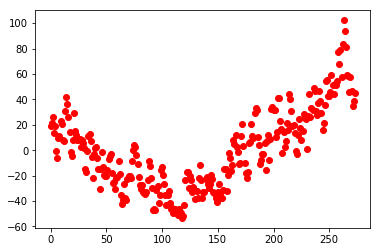

In [2]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import mixture
from collections import Counter

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import Audio, display

def main(year):
    
    ini = year*365
    final = ini + 365
    X = dataValues.loc[ini:final].copy().values

    xAxis = [i for i in range(len(X))]

    pca = PCA(n_components=1)
    X = pca.fit_transform(X)

    plt.scatter(xAxis, X, c="r")
    plt.show()
    
path = os.getcwd()+'\\data\\'
dataValues = pd.read_csv(path+'noaa_data.csv',sep = ",")
dataLabels = pd.read_csv(path+'noaa_label.csv',sep = ",")

v = interact(main, year=(0, 49, 1));
display(v)